# Lecture 2: Supervised Learning

In this lab, you will learn to decode hand position from neural activity in the primate primary motor cortex (M1) using GLMs and random fores

In [23]:
import numpy as np
import scipy.io
import sklearn
from pyglmnet import GLM

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

#for plots
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.xaxis.set_tick_params(size=6)
    ax.yaxis.set_tick_params(size=6)

colors=['#F5A21E', '#02A68E', '#EF3E34', '#134B64', '#FF07CD','b']

# Data
Below we load a dataset available on CRCNS: a [Macaque M1](http://crcns.org/data-sets/movements/dream/downloading-dream) (from [Stevenston et al. 2011](http://jn.physiology.org/content/106/2/764.short)).

The data has been organized in Matlab into neat arrays for easy loading here.

We will soon want a single numpy array representing the external covariates, and a single numpy vector representing the neural response. The data array X will be of dimensions (n, p), where n is the number of time bins and p is the number of covariates, and the response y will be of dimensions (n, ).

#### Load data

In [24]:
m1 = scipy.io.loadmat('data/m1_stevenson_2011.mat')
m1['time'] = m1['time'].squeeze()
m1['sampling_rate'] = 1/np.diff(m1['time']).mean()

### Plot raw M1 data

This gives some intuitive feeling for the type of data we're working with.

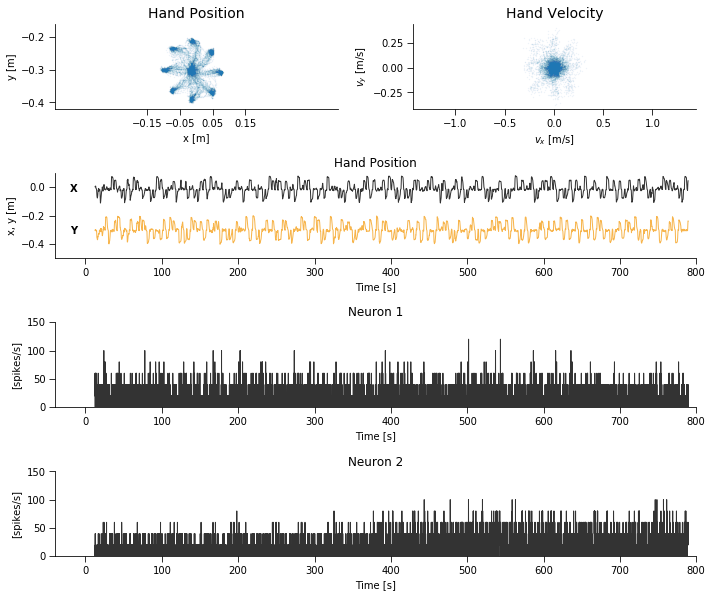

In [4]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'medium'

# Position scatter
ts = 14
gs0 = gridspec.GridSpec(5, 2)
plt.subplot(gs0[0,0])
simpleaxis(plt.gca())
plt.scatter(m1['handPos'][0,:], m1['handPos'][1,:], s=.1, alpha=.1)

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')
plt.title('Hand Position',fontsize=ts)
plt.ylim([-0.42,-0.16])
plt.xlim([-0.15,0.15])
plt.xticks(np.arange(-0.15,0.2, .1))

# Velocity scatter
plt.subplot(gs0[0,1])
simpleaxis(plt.gca())
plt.scatter(m1['handVel'][0,:], m1['handVel'][1,:], s=.1, alpha=.1)

plt.xlabel('$v_x$ [m/s]')
plt.ylabel('$v_y$ [m/s]')
plt.axis('equal')
plt.title('Hand Velocity',fontsize=ts)

# Position trace
plt.subplot(gs0[1,:])
a=plt.gca()
simpleaxis(a)
a.text(-20,-.03,'X',weight='bold')
a.text(-20,-.33,'Y',weight='bold')
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['handPos'][0,:], 'k-', alpha=alpha, lw=lw)
plt.plot(m1['time'], m1['handPos'][1,:], '-', color=colors[0], alpha=alpha, lw=lw)
a.axis([-40,800,-0.5,0.1])

plt.xlabel('Time [s]')
plt.ylabel('x, y [m]')
plt.title('Hand Position')


# Neuron 1 firing rate
plt.subplot(gs0[2,:])
a=plt.gca()
simpleaxis(a)
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['sampling_rate']*m1['spikes'][0,:], 'k-', alpha=alpha, lw=lw)
a.axis([-40,800,0.0,150])

plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.title('Neuron 1')

# Neuron 1 firing rate
plt.subplot(gs0[3,:])
a=plt.gca()
simpleaxis(a)
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['sampling_rate']*m1['spikes'][1,:], 'k-', alpha=alpha, lw=lw)
a.axis([-40,800,0.0,150])

plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.title('Neuron 2')


plt.tight_layout()
plt.show()

## Exercise 1: Decode hand position from neural activity using a linear decoder

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.signal import medfilt

def plot_positions(t, Y_test, Y_predict):
    """Plots true and predicted hand positions over time"""
    plt.figure(figsize=(15,10))
    a=plt.gca()
    simpleaxis(a)
    a.text(np.min(t)-20,-.03,'X',weight='bold')
    a.text(np.min(t)-20,-.33,'Y',weight='bold')
    alpha = 0.9
    lw = 1
    plt.plot(t_test, medfilt(Y_predict.T[0,:], 5), 'c-', t_test, Y_test.T[0,:], 'm-', alpha=alpha, lw=lw)
    plt.plot(t_test, medfilt(Y_predict.T[1,:], 5), 'c-', t_test, Y_test.T[1,:], 'm-', alpha=alpha, lw=lw)
    plt.legend(['pred', 'true'])
    plt.xlabel('Time [s]')
    plt.ylabel('x, y [m]')
    plt.title('Hand Position')
    plt.show()
    
def mean_absolute_percentage_error(Y_test, Y_predict):
    return float(np.mean(np.abs((Y_test - Y_predict)/Y_predict)))

def score_positions(Y_test, Y_predict):
    """Scores given hand positions using standard metrics"""
    return (mean_squared_error(Y_test, Y_predict),
            mean_absolute_error(Y_test, Y_predict),
            r2_score(Y_test, Y_predict),
            mean_absolute_percentage_error(Y_test, Y_predict))

MSE: 0.0010110152729565774
MAE: 0.025649294042817385
COD: 0.49596602961637776
MAPE: 2.6048403528547275


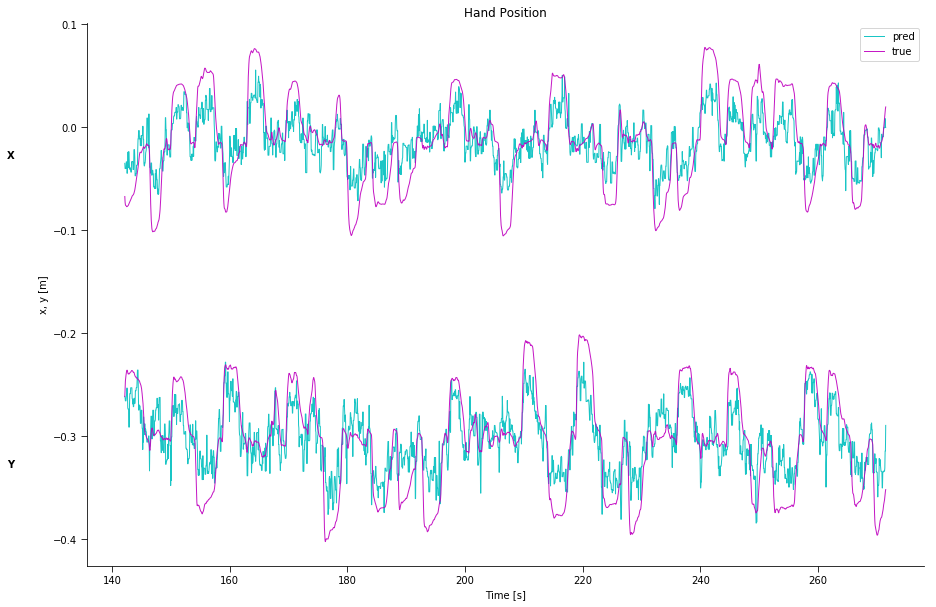

MSE: 0.001007357591612029
MAE: 0.025343890794138936
COD: 0.4941064415823518
MAPE: 2.3011950209757632


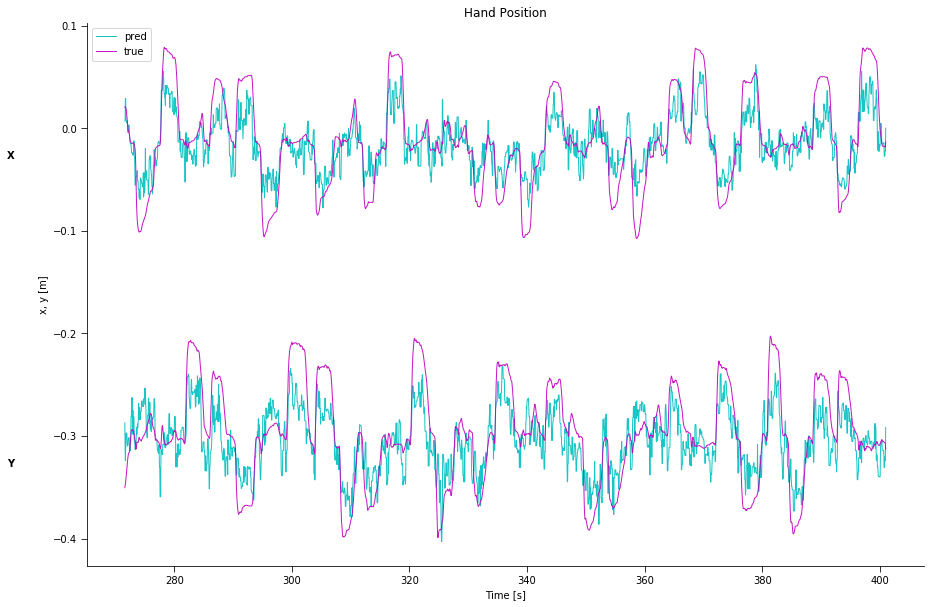

MSE: 0.0009605984908681179
MAE: 0.024905825825075986
COD: 0.5059302626453577
MAPE: 2.0104161497174533


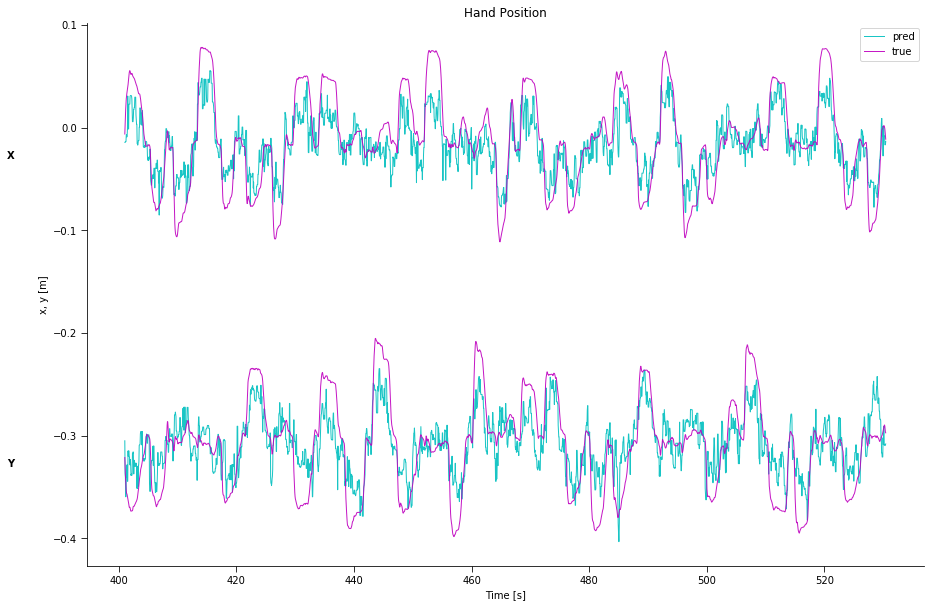

MSE: 0.0009517210816458663
MAE: 0.024772737288010764
COD: 0.5273198305910061
MAPE: 3.314966885525544


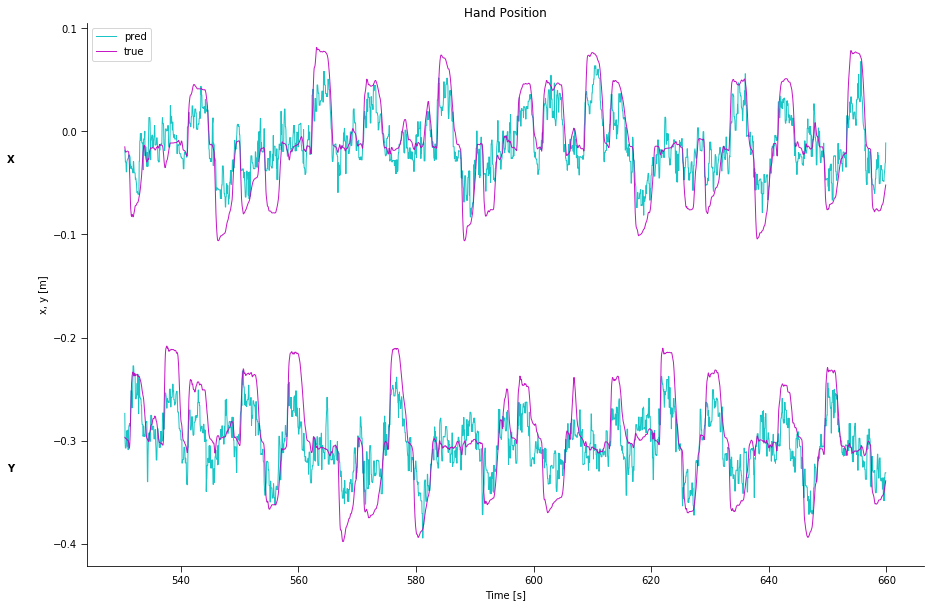

MSE: 0.001120026846754685
MAE: 0.02577164081673501
COD: 0.43979134541510306
MAPE: 1.7886127402754288


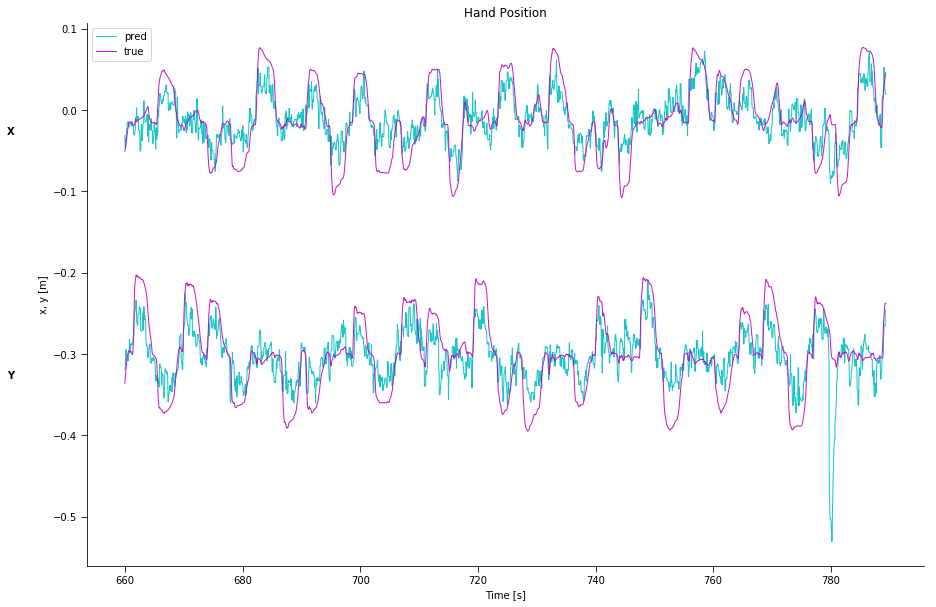

avg MSE: 0.001010143856767455
avg MAE: 0.025288677753355616
avg COD: 0.4926227819700393
avg MAPE: 2.4040062298697835


In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import linear_model

# load data (X is neural activity, Y is hand position response)
Y = m1['handPos'].T[:,0:2]
X = m1['spikes'].T
t = m1['time']

tscv = TimeSeriesSplit(n_splits=5)

scores = []

# iterate through time splits and train/predict
for train_index, test_index in tscv.split(t):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    t_train, t_test = t[train_index], t[test_index]

    clf = linear_model.RidgeCV()
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    
    (mse, mae, cod, mape) = score_positions(Y_test, Y_predict)
    scores.append([mse, mae, cod, mape])
    print("MSE: {0}".format(mse))
    print("MAE: {0}".format(mae))
    print("COD: {0}".format(cod))
    print("MAPE: {0}".format(mape))
    plot_positions(t_test, Y_test, Y_predict)

scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)

print("avg MSE: {0}".format(avg_scores[0]))
print("avg MAE: {0}".format(avg_scores[1]))
print("avg COD: {0}".format(avg_scores[2]))
print("avg MAPE: {0}".format(avg_scores[3]))

## Exercise 2: Find the 10 best neurons for decoding hand position

MSE: 0.0010096483948229186
MAE: 0.025734786733013805
COD: 0.49578540268778043
MAPE: 2.65948608795111


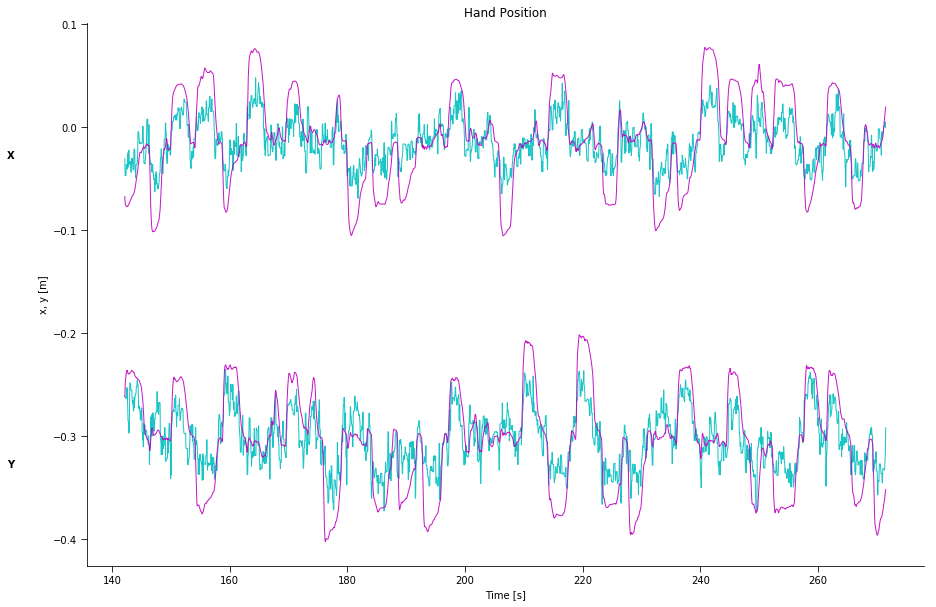

MSE: 0.0010056847218595584
MAE: 0.025359456899145906
COD: 0.4945830307920135
MAPE: 2.798270414082989


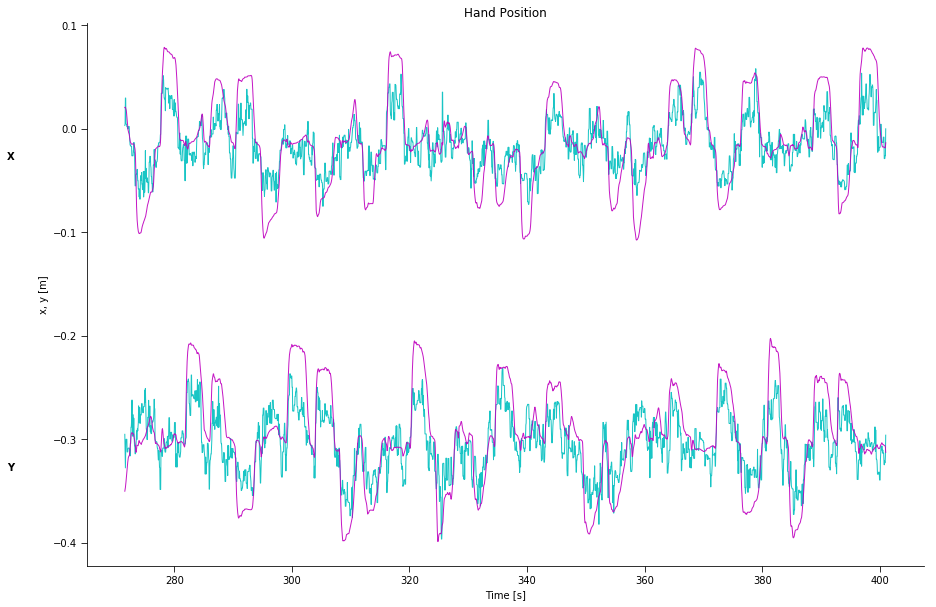

MSE: 0.0009562215624131394
MAE: 0.02483271406753719
COD: 0.5081911881640455
MAPE: 3.0625925985754603


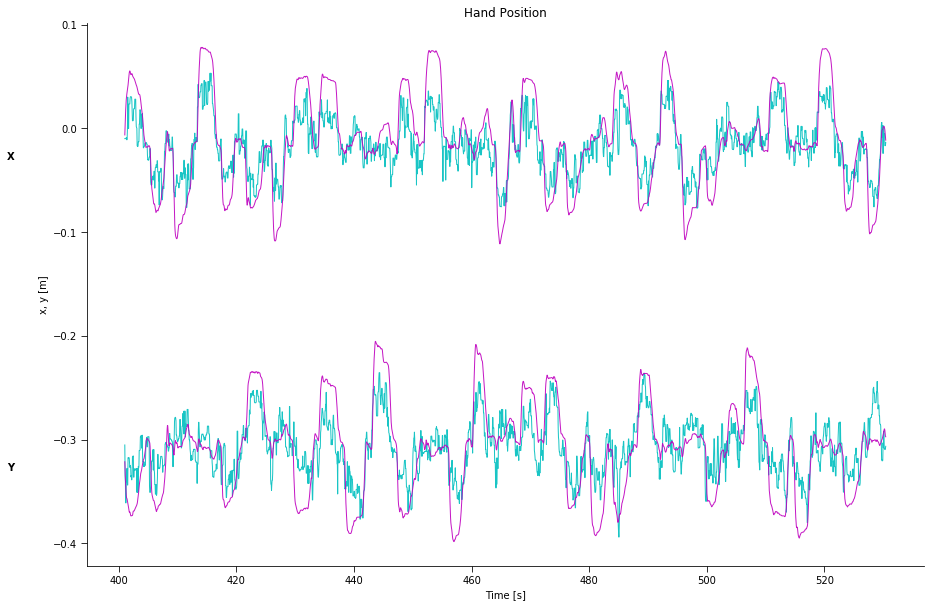

MSE: 0.0009551941851660478
MAE: 0.02480805675057817
COD: 0.5256370095839039
MAPE: 1.934998192637747


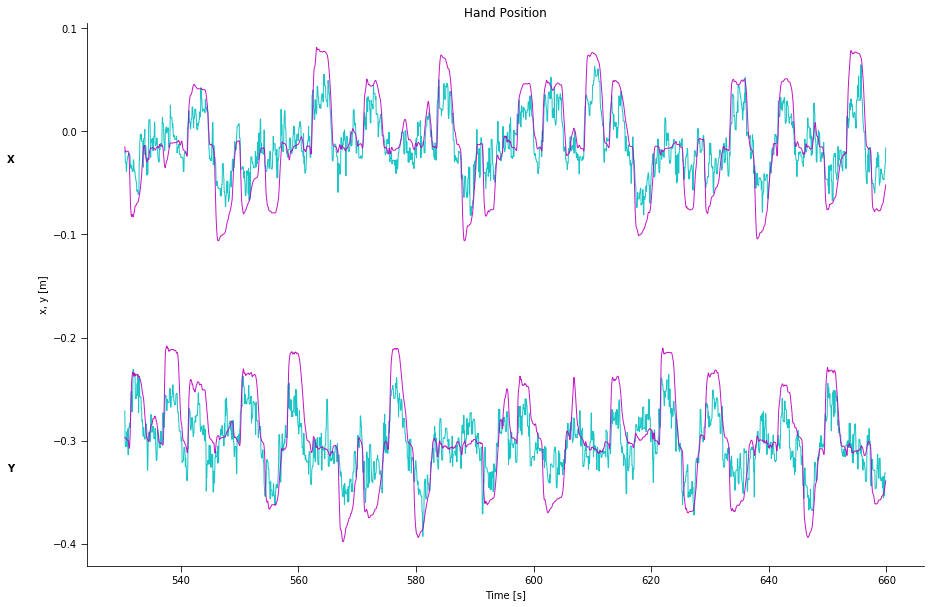

MSE: 0.0011059369233772992
MAE: 0.025727110431964677
COD: 0.4464176570139734
MAPE: 2.471860063857612


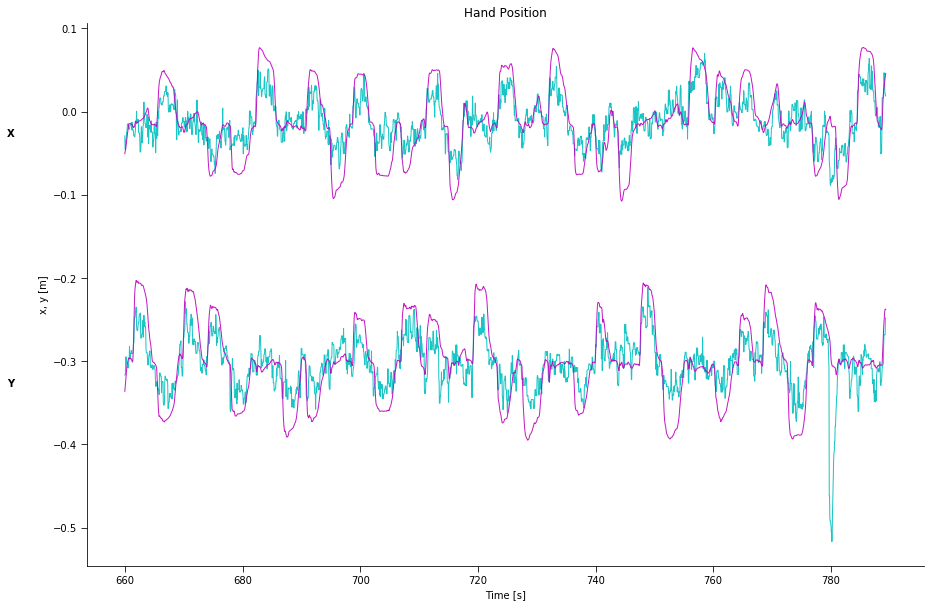

avg MSE: 0.0010065371575277927
avg MAE: 0.02529242497644795
avg COD: 0.4941228576483433
avg MAPE: 2.585441471420984
10 best neurons: [  2 141  32 111  50  59  48  16  98 154]


In [6]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import linear_model

# load data (X is neural activity, Y is hand position response)
Y = m1['handPos'].T[:,0:2]
X = m1['spikes'].T
t = m1['time']

tscv = TimeSeriesSplit(n_splits=5)

scores = []
avg_neuron_weights = []

# iterate through time splits and train/predict
for train_index, test_index in tscv.split(t):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    t_train, t_test = t[train_index], t[test_index]

    clf = linear_model.MultiTaskLassoCV() # /!\ using default Lasso causes flat prediction
    clf.fit(X_train, Y_train)
    avg_neuron_weights.append(np.mean(clf.coef_, axis=0))
    Y_predict = clf.predict(X_test)
    
    (mse, mae, cod, mape) = score_positions(Y_test, Y_predict)
    scores.append([mse, mae, cod, mape])
    print("MSE: {0}".format(mse))
    print("MAE: {0}".format(mae))
    print("COD: {0}".format(cod))
    print("MAPE: {0}".format(mape))
    plot_positions(t_test, Y_test, Y_predict)

scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)

print("avg MSE: {0}".format(avg_scores[0]))
print("avg MAE: {0}".format(avg_scores[1]))
print("avg COD: {0}".format(avg_scores[2]))
print("avg MAPE: {0}".format(avg_scores[3]))

avg_neuron_weights = np.mean(avg_neuron_weights, axis=0)
ind = np.argpartition(avg_neuron_weights, -10)[-10:]

print("10 best neurons: {0}".format(ind))

## Exercise 3: Build the best possible nonlinear decoder

MSE: 0.001052162840924875
MAE: 0.02573480992298327
COD: 0.47362244629422107
MAPE: 2.888956727458987


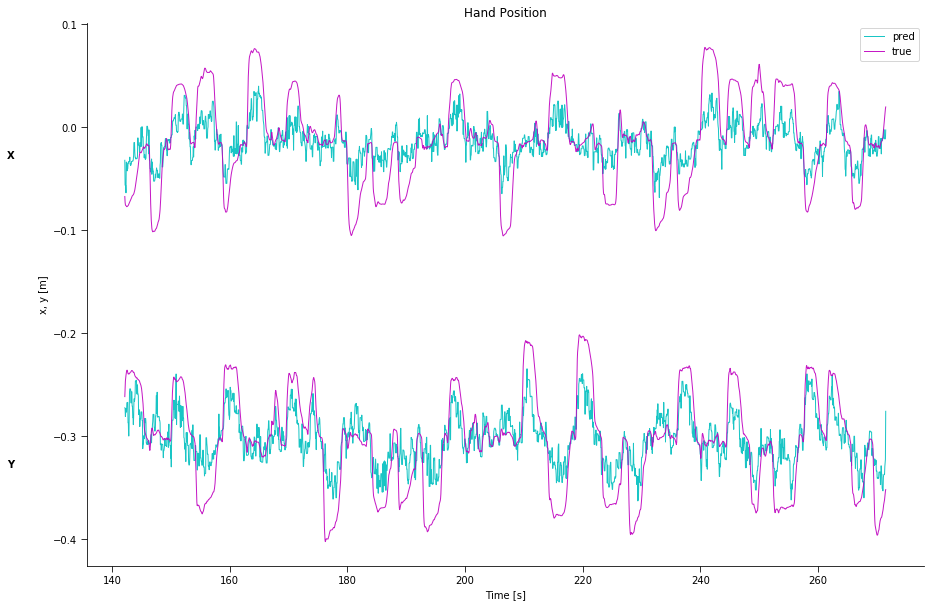

MSE: 0.0010059595296915505
MAE: 0.02503445864703542
COD: 0.49216562340948167
MAPE: 3.979529242243102


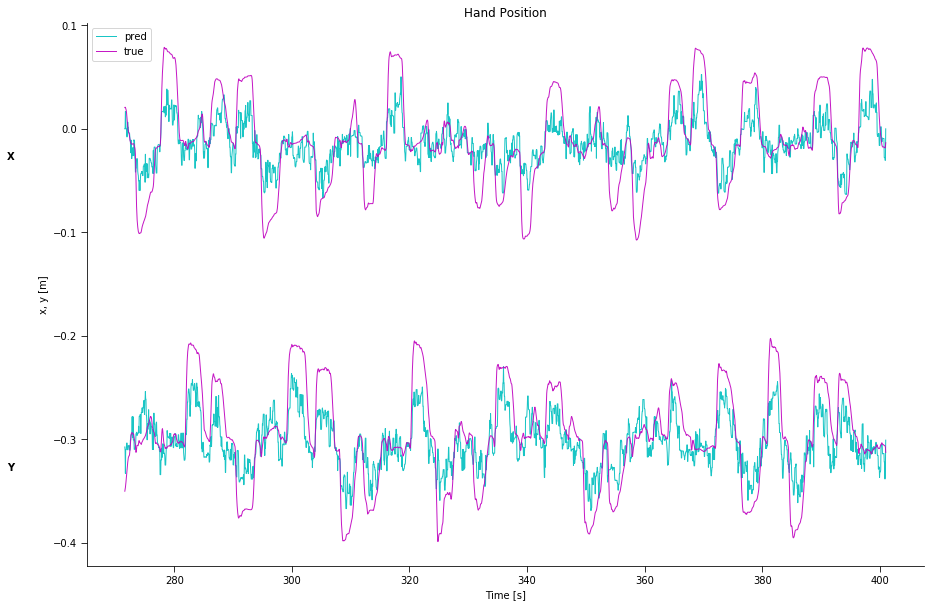

MSE: 0.0009664488907003609
MAE: 0.02446737818684082
COD: 0.5030491768457519
MAPE: 5.728445697170871


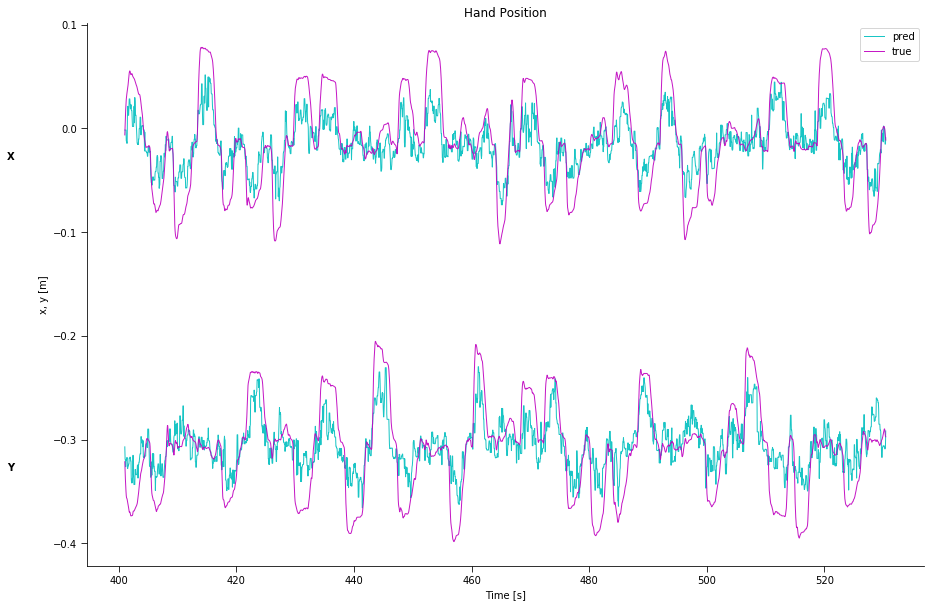

MSE: 0.0009389476194875447
MAE: 0.024236623159157
COD: 0.5340426275203336
MAPE: 2.634032179363878


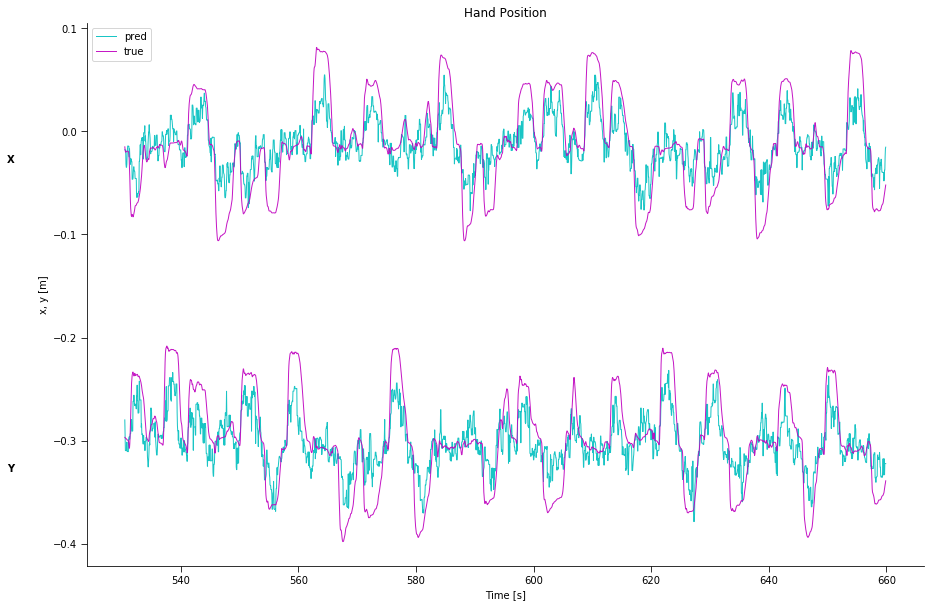

MSE: 0.0009701201576168682
MAE: 0.024584138169509558
COD: 0.5104135180058291
MAPE: 1.872339616218269


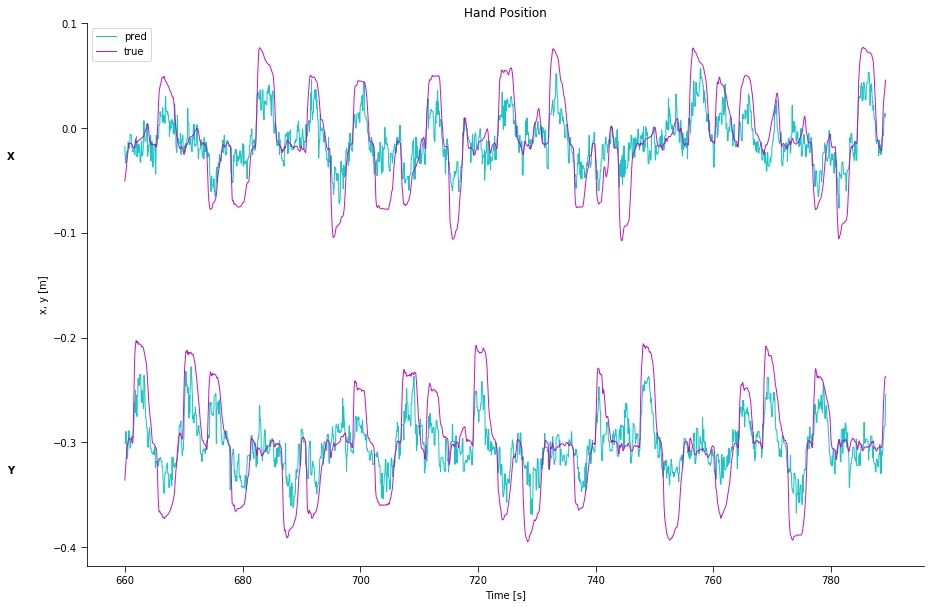

avg MSE: 0.0009867278076842398
avg MAE: 0.024811481617105214
avg COD: 0.5026586784151235
avg MAPE: 3.4206606924910212


In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import ensemble

# load data (X is neural activity, Y is hand position response)
Y = m1['handPos'].T[:,0:2]
X = m1['spikes'].T
t = m1['time']

tscv = TimeSeriesSplit(n_splits=5)

scores = []

# iterate through time splits and train/predict
for train_index, test_index in tscv.split(t):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    t_train, t_test = t[train_index], t[test_index]

    clf1 = ensemble.GradientBoostingRegressor(loss='huber',n_estimators=100)
    clf1.fit(X_train, Y_train[:,0])
    clf2 = ensemble.GradientBoostingRegressor(loss='huber',n_estimators=100)
    clf2.fit(X_train, Y_train[:,1])
    Y1_predict = clf1.predict(X_test)
    Y2_predict = clf2.predict(X_test)
    Y_predict = np.stack([Y1_predict, Y2_predict], axis=-1)
    
    (mse, mae, cod, mape) = score_positions(Y_test, Y_predict)
    scores.append([mse, mae, cod, mape])
    print("MSE: {0}".format(mse))
    print("MAE: {0}".format(mae))
    print("COD: {0}".format(cod))
    print("MAPE: {0}".format(mape))
    plot_positions(t_test, Y_test, Y_predict)

scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)

print("avg MSE: {0}".format(avg_scores[0]))
print("avg MAE: {0}".format(avg_scores[1]))
print("avg COD: {0}".format(avg_scores[2]))
print("avg MAPE: {0}".format(avg_scores[3]))

## Exercise 4: Build an encoding model for neuron 0 to predict neural activity from hand position and velocity using a linear-nonlinear-Poisson GLM

Use `statsmodels`

Install using `pip install statsmodels`

In [7]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [8]:
# function to convert cartesian coordinates to radial coordinates
def convert_2_angular_coord(Y):
    radius = np.sqrt(Y[:,0]**2+Y[:,1]**2).reshape([-1,1])
    radius = radius
    angle = np.angle(Y[:,0]+Y[:,1]*1j, deg=False).reshape([-1,1])
    angle = np.cos(angle)
    return radius, angle

# create meshgrid to plot tuninng curves
def create_dummy_xy_coordinates(Y_centered):
    ''' return augmented dummy Y - Tx [1, x_coord, y_coord]'''
    ymax = Y_centered.max(axis = 0).max()
    ymin = Y_centered.min(axis = 0).min()
    x_coord = np.arange(ymin, ymax, 0.01)
    y_coord = np.arange(ymin, ymax, 0.01)
    xx_cart_coord, yy_cart_coord = np.meshgrid(x_coord, y_coord)
    return xx_cart_coord, yy_cart_coord

def augment_data(Y):
    return np.hstack([np.ones([Y.shape[0],1]),Y]) 

In [9]:
# center data
Y_centered = Y-Y.mean(axis = 0)
# don't forget to add a bias term
Y_cart = augment_data(Y_centered)

# convert to radial coordinate
radius, angle = convert_2_angular_coord(Y)
# don't forget to add a bias term
Y_rad = augment_data(np.hstack([radius, angle]))

# combine both?
Y_comb = np.hstack([Y_cart, radius, angle])


In [10]:
# select your favourite neurons
best_neurons = [0, 2, 141, 32, 111, 50, 59, 48, 16, 98, 154]

In [11]:
# generate dummy hand coordinates in both cartesian and radial coordinates
# for cartesian coordinates
xx_cart_coord, yy_cart_coord  = create_dummy_xy_coordinates(Y_centered)
Y_cart_dummy = augment_data(np.vstack([ xx_cart_coord.flatten(), yy_cart_coord.flatten()]).T )   

# repeat for radial coordinates
radius_dummy, angle_dummy = convert_2_angular_coord(Y_cart_dummy[:,1:3])
Y_rad_dummy = augment_data(np.hstack([radius_dummy, angle_dummy]))

# repeat for both (or add your favourite features)
Y_comb_dummy = np.hstack([Y_cart_dummy, radius_dummy, angle_dummy])

In [12]:
## split data
## create a model
## fit model
## predict firing rate on dummy grid
def run_model(neuron_num, X, Y_cart, Y_cart_dummy, xx_cart):
    X_train, X_test, y_train, y_test = train_test_split(X[:,neuron_num:neuron_num+1], Y_cart, test_size=0.33, random_state=0) 
    poisson_model = sm.GLM(X_train, y_train,\
                      family=sm.families.Poisson()) 
    results = poisson_model.fit() 
    rate_pred = results.predict(Y_cart_dummy)
    rate_pred = rate_pred.reshape([xx_cart.shape[0],-1])
    data = [X_train, X_test, y_train, y_test] 
    return poisson_model, results, rate_pred, data

In [13]:
poisson_model_cart, results_cart, rate_pred_cart, data_cart = \
run_model(best_neurons[0], X, Y_cart, Y_cart_dummy, xx_cart_coord)


poisson_model_radial, results_radial, rate_pred_radial, data_radial = \
run_model(best_neurons[0], X, Y_rad, Y_rad_dummy, xx_cart_coord)

poisson_model_comb, results_comb, rate_pred_comb, data_comb = \
run_model(best_neurons[0], X, Y_comb, Y_comb_dummy, xx_cart_coord)

In [14]:
print(results_cart.summary())
print(results_radial.summary())
print(results_comb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                10409
Model:                            GLM   Df Residuals:                    10406
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10311.
Date:                Tue, 18 Sep 2018   Deviance:                       11025.
Time:                        13:34:31   Pearson chi2:                 1.09e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5835      0.013    -44.424      0.000      -0.609      -0.558
x1            -0.7235      0.307     -2.360      0.0

In [15]:
def plot_predictions(rate_pred_cart,rate_pred_radial,rate_pred_comb, xx_cart_coord, title):
    fig = plt.figure(figsize = (21,10))
    extent = [xx_cart_coord[0,0],xx_cart_coord[-1,-1], xx_cart_coord[0,0],xx_cart_coord[-1,-1]] 
    fig.add_subplot(1,3,1)
    plt.imshow(rate_pred_cart, extent = extent)
    plt.title('predicted firing rate with \ncartesian basis', fontsize = 23)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')

    fig.add_subplot(1,3,2)
    plt.imshow(rate_pred_radial, extent = extent)
    plt.title('predicted firing rate with \nradial basis', fontsize = 23)
    plt.yticks([])
    plt.xlabel('x coordinate')

    fig.add_subplot(1,3,3)
    plt.imshow(rate_pred_comb, extent = extent)
    plt.title('predicted firing rate with \nboth feature vector', fontsize = 23)

    plt.yticks([])
    plt.xlabel('x coordinate')
    plt.suptitle(title)
    # plt.ylabel('y coordinate')
    plt.tight_layout()

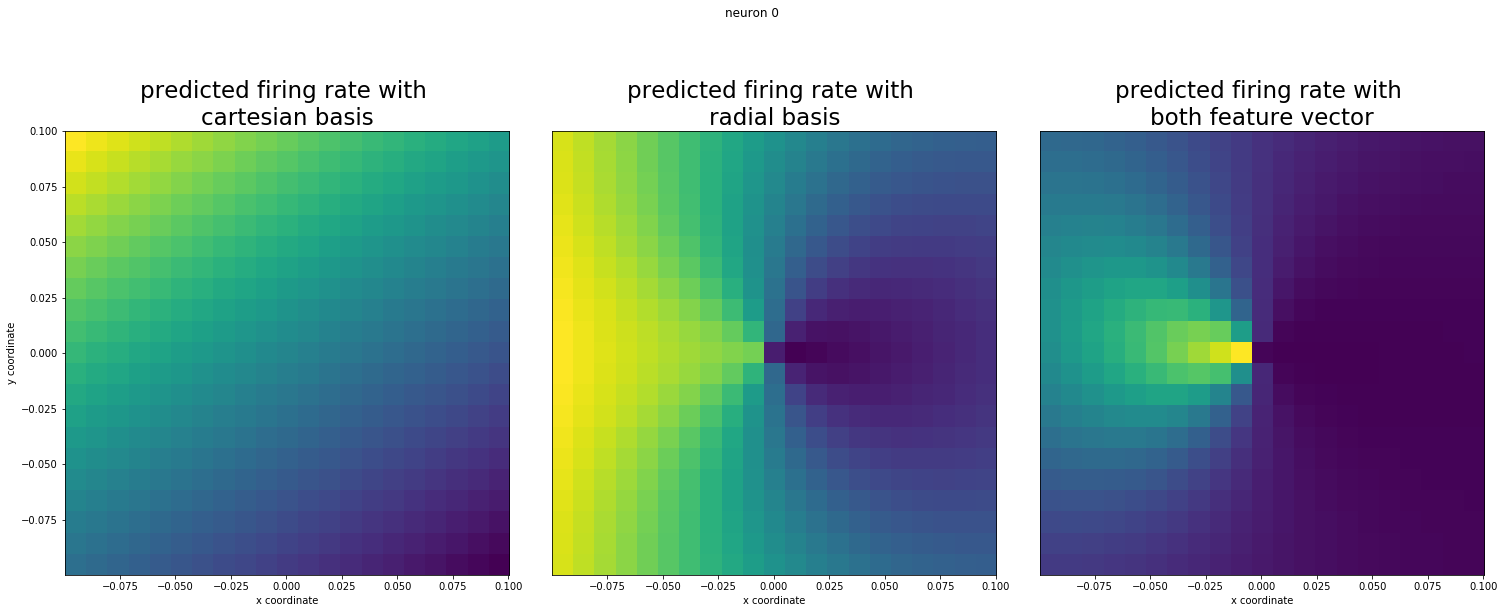

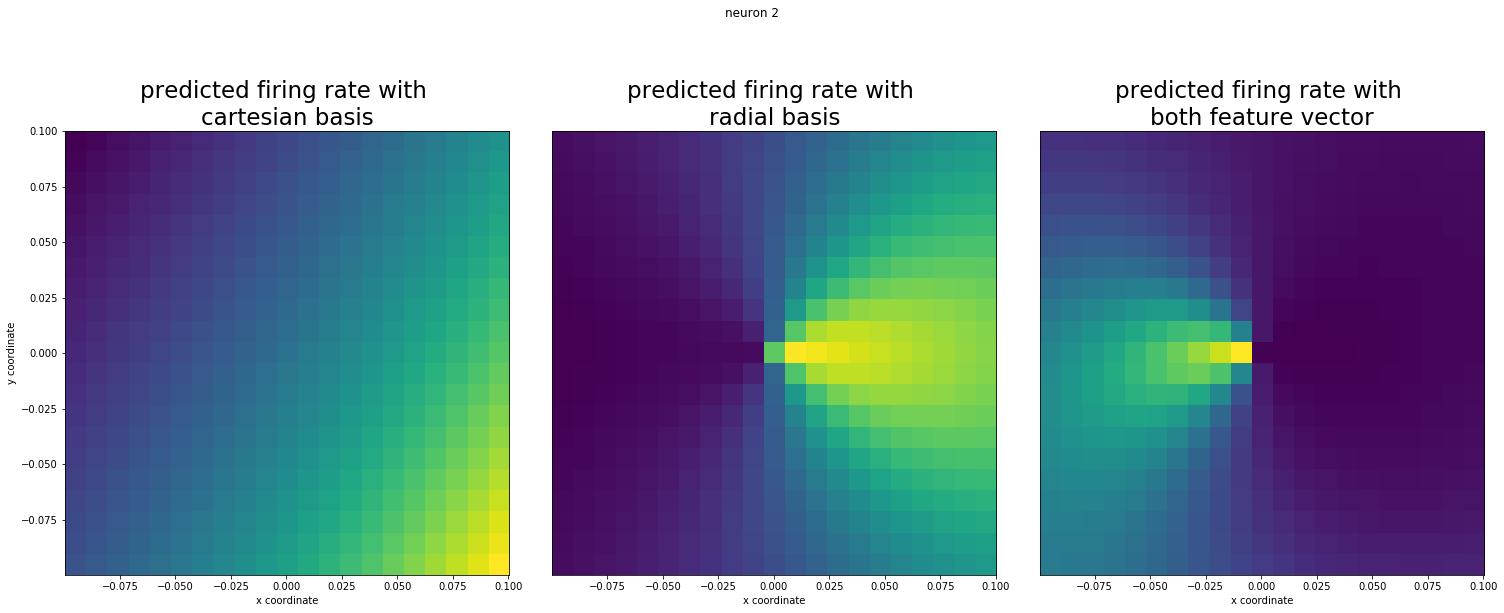

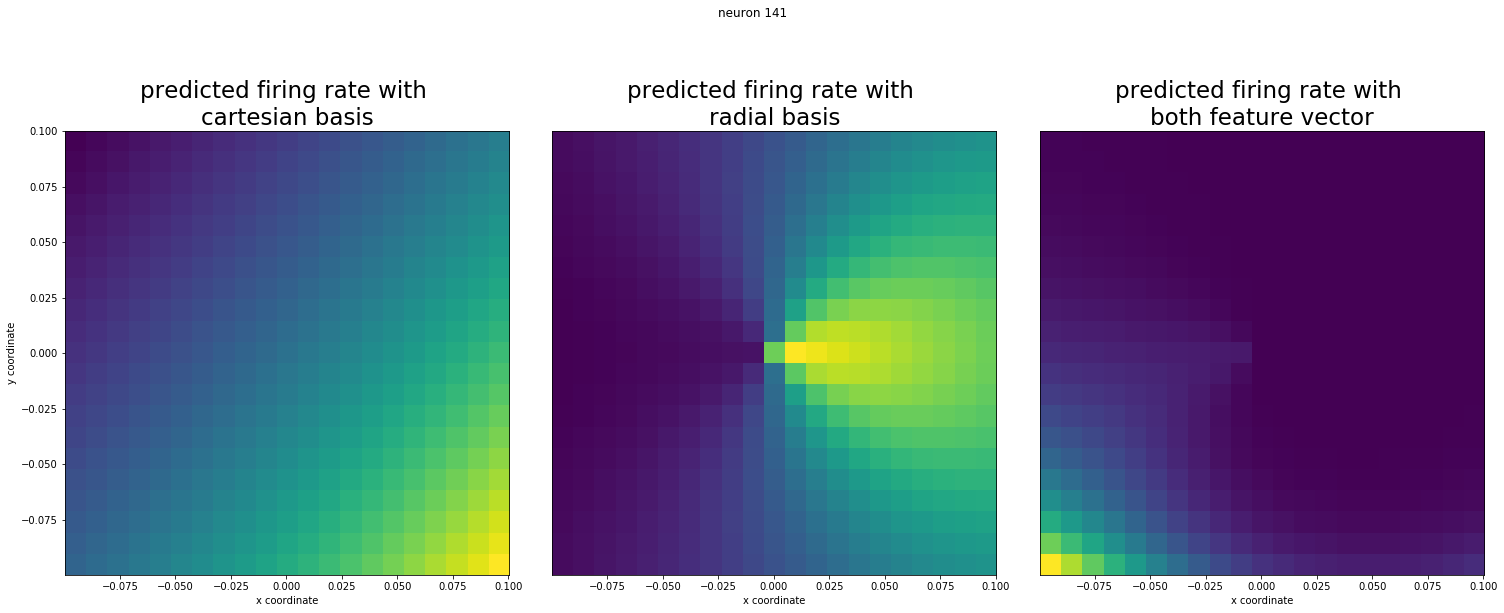

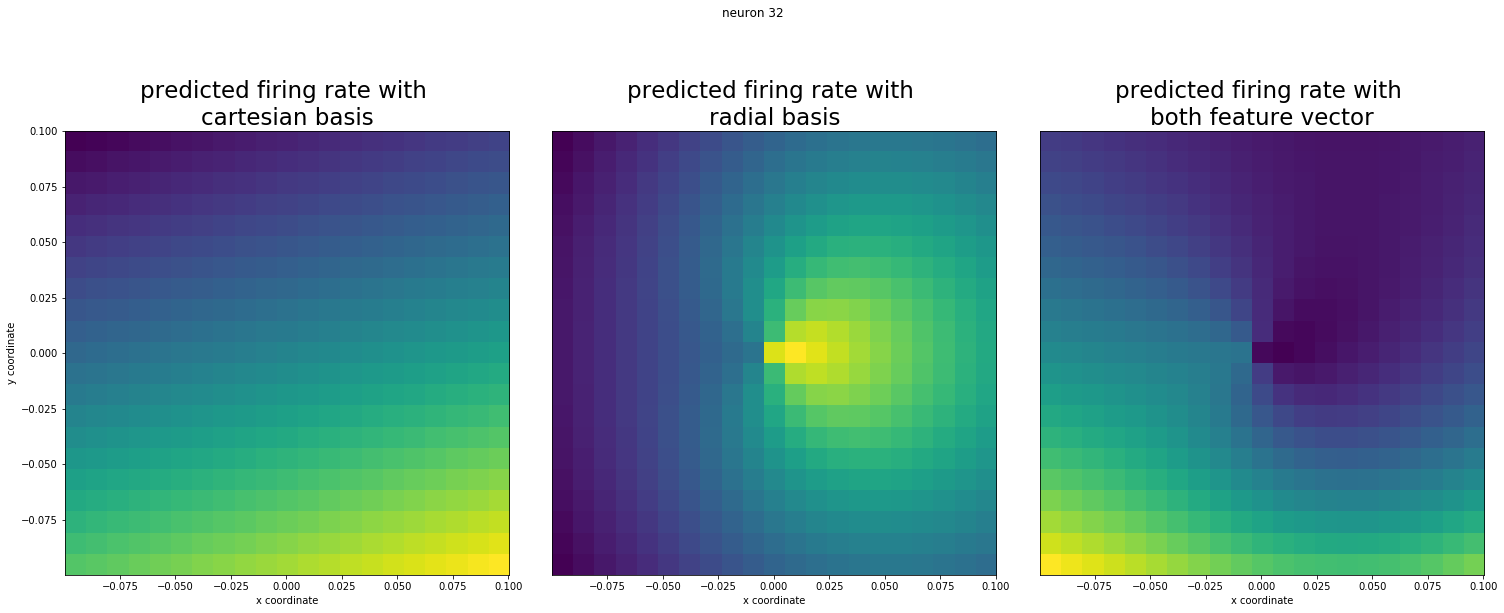

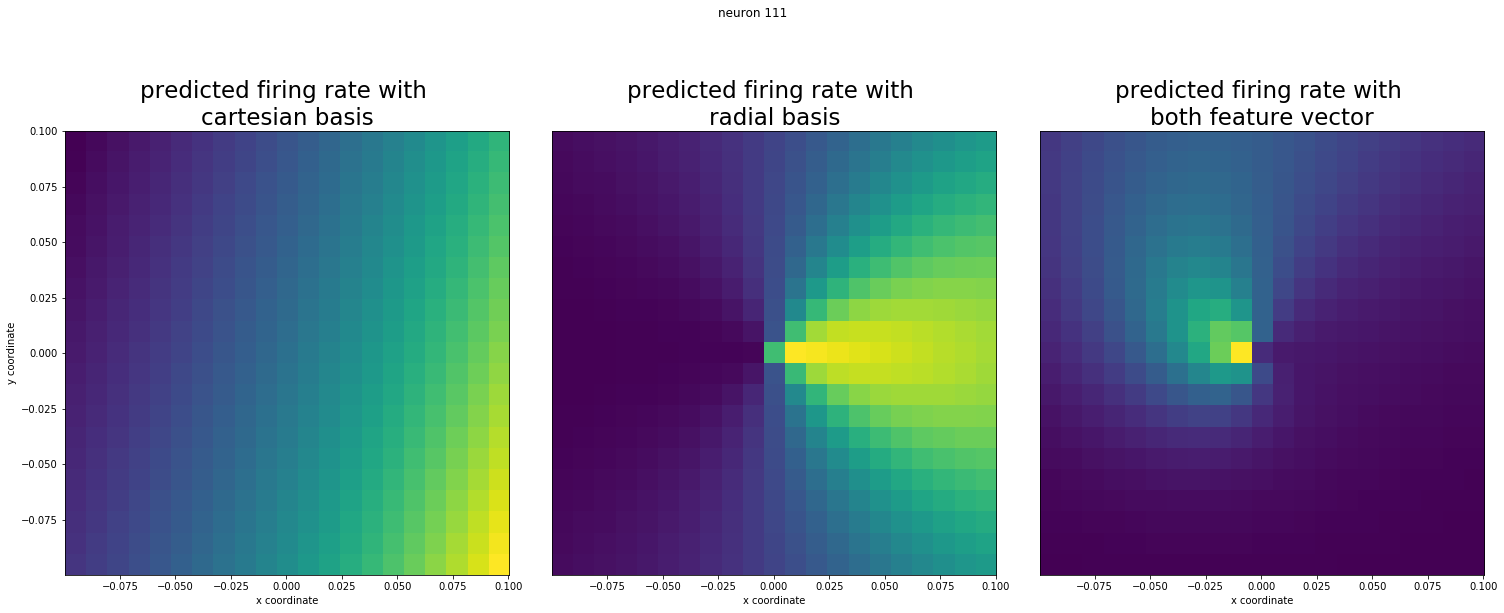

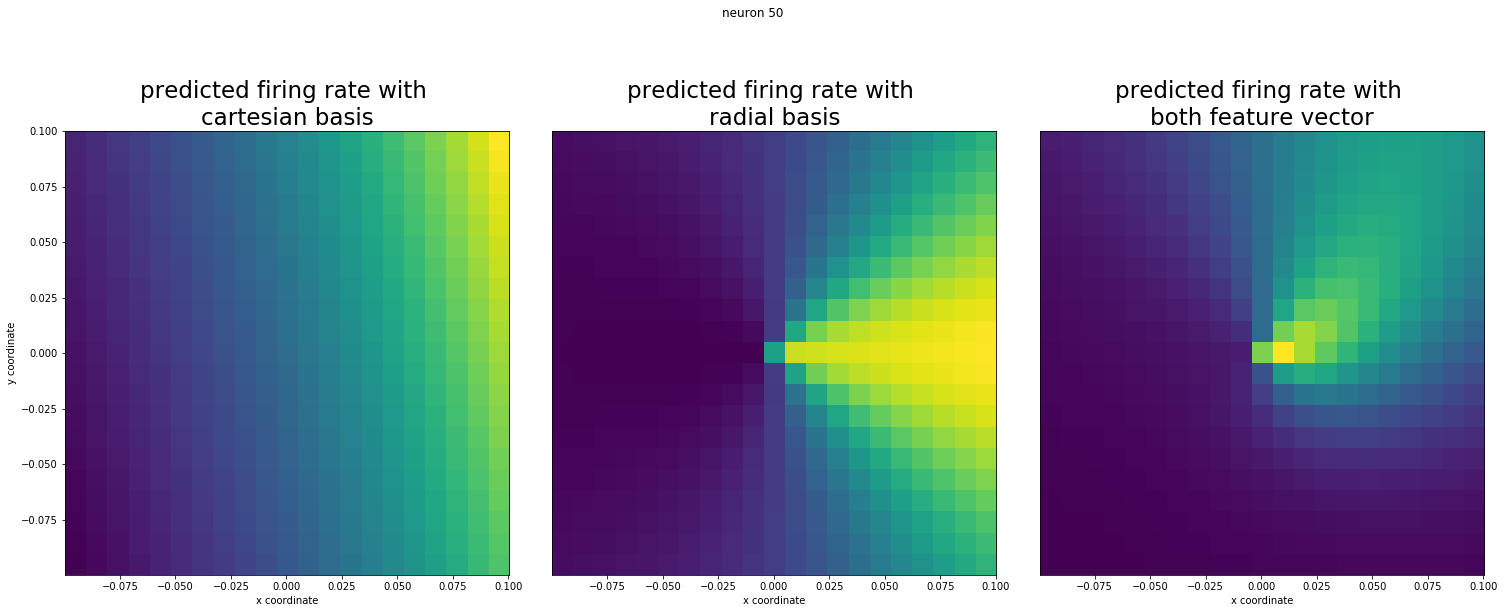

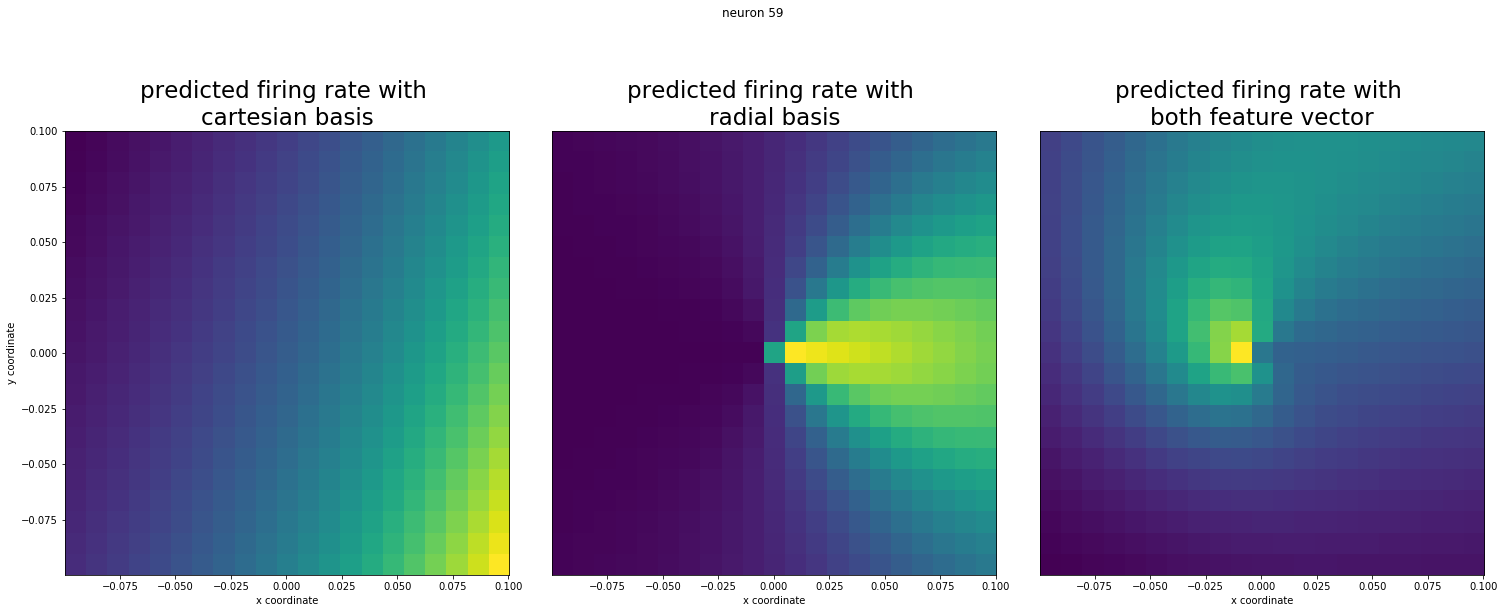

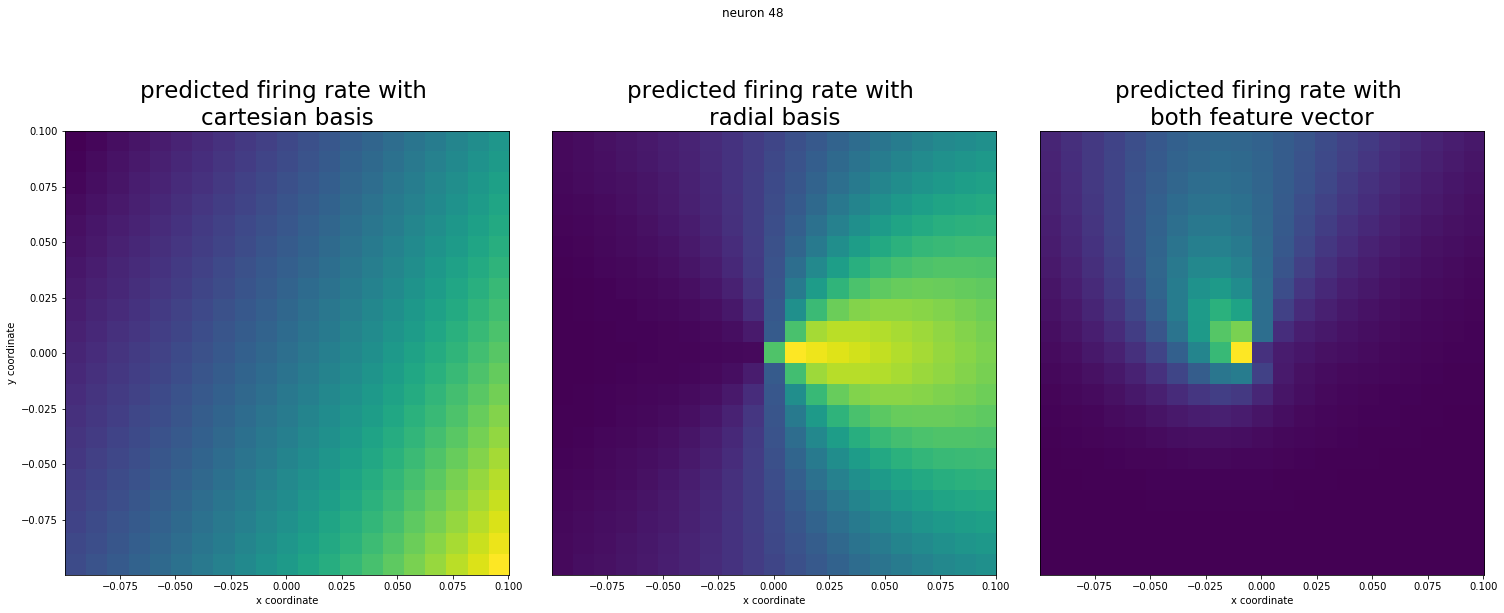

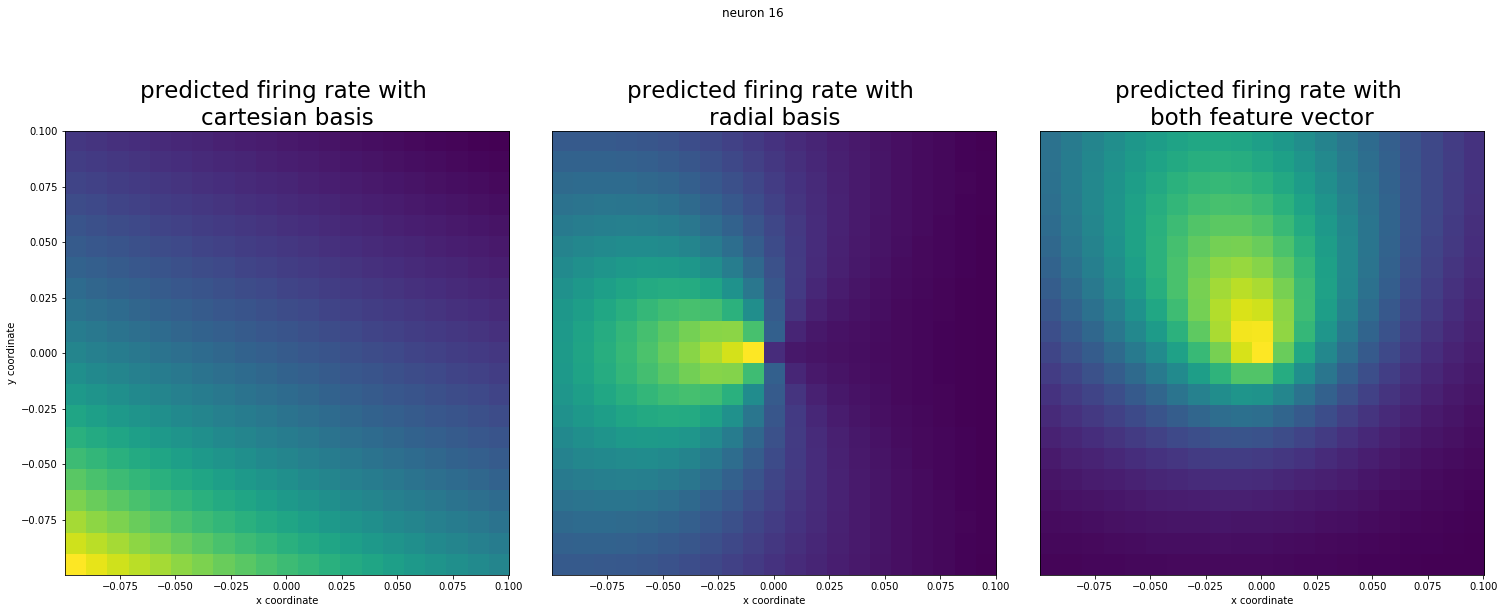

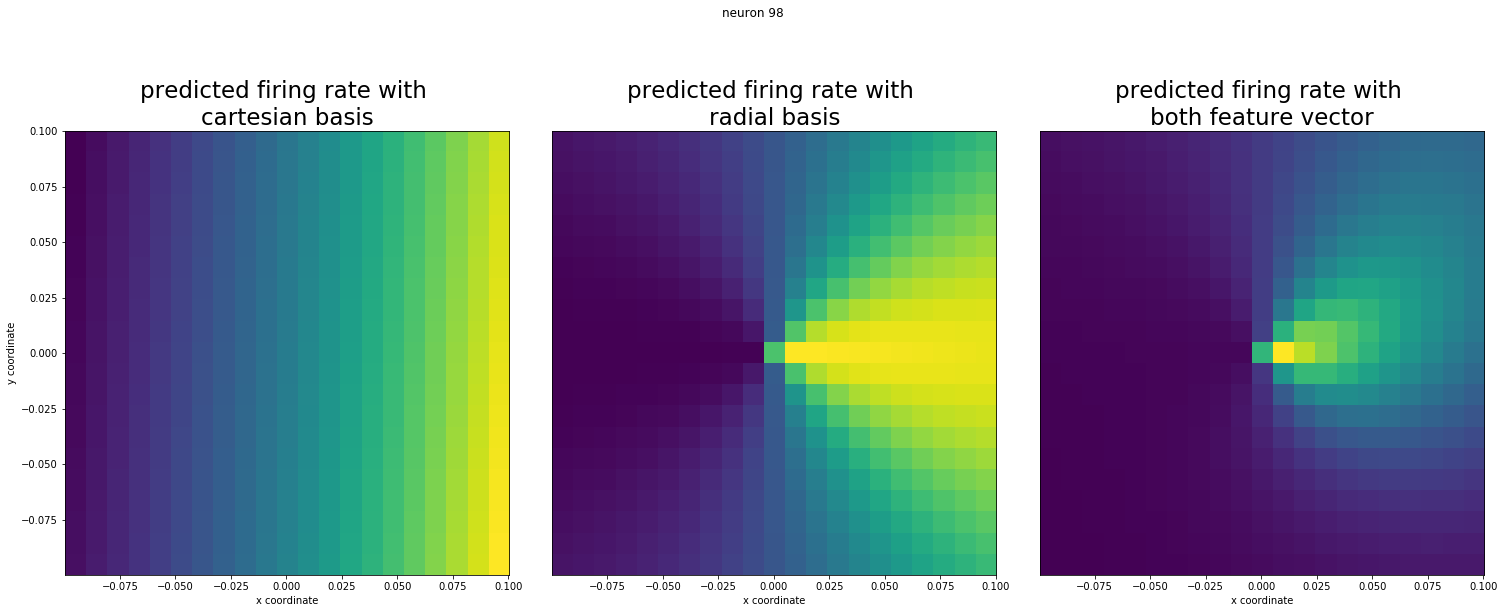

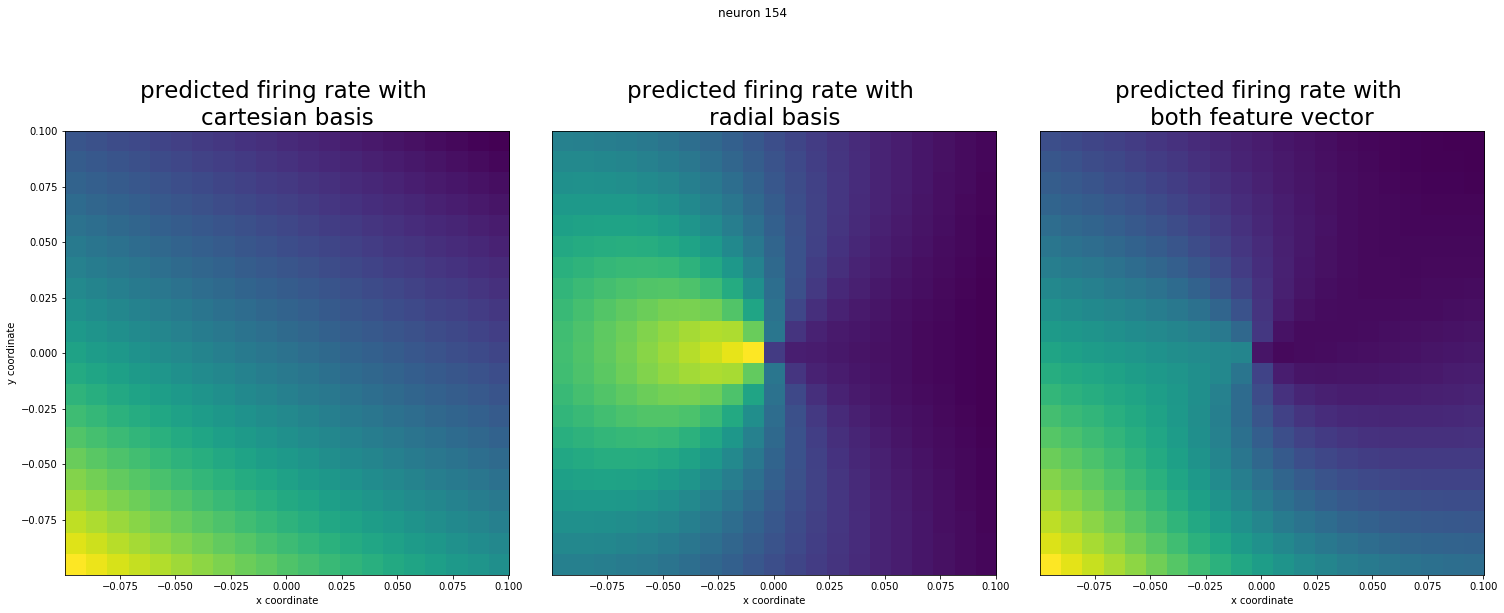

In [16]:
for i, ind in enumerate(best_neurons):
    poisson_model_cart, results_cart, rate_pred_cart, data_cart = \
    run_model(best_neurons[i], X, Y_cart, Y_cart_dummy, xx_cart_coord)


    poisson_model_radial, results_radial, rate_pred_radial, data_radial = \
    run_model(best_neurons[i], X, Y_rad, Y_rad_dummy, xx_cart_coord)

    poisson_model_comb, results_comb, rate_pred_comb, data_comb = \
    run_model(best_neurons[i], X, Y_comb, Y_comb_dummy, xx_cart_coord)
    title = 'neuron ' + str(ind)
    plot_predictions(rate_pred_cart,rate_pred_radial,rate_pred_comb, xx_cart_coord, title)

In [52]:
#sample from the inferred distribution
x_hat = results_cart.mu
samples = np.random.poisson(x_hat)

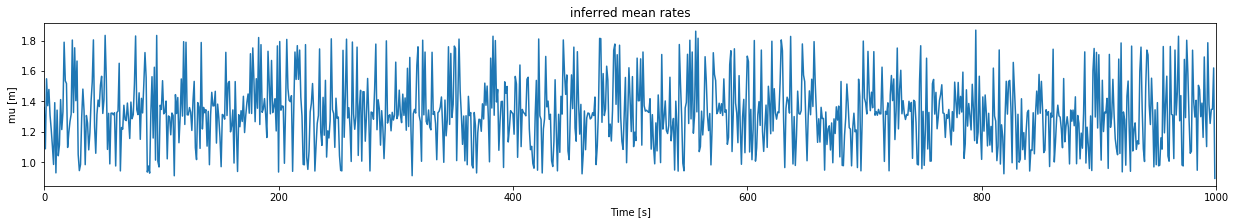

In [20]:
fig = plt.figure(figsize = (21, 3))
title = 'inferred mean rates'
plt.title(title)
minmax = (0, 1000)
plt.plot(x_hat[minmax[0]:minmax[1]])
plt.xlabel('Time [s]')
plt.ylabel('mu [m]')
plt.xlim([minmax[0],minmax[1]])
plt.show()

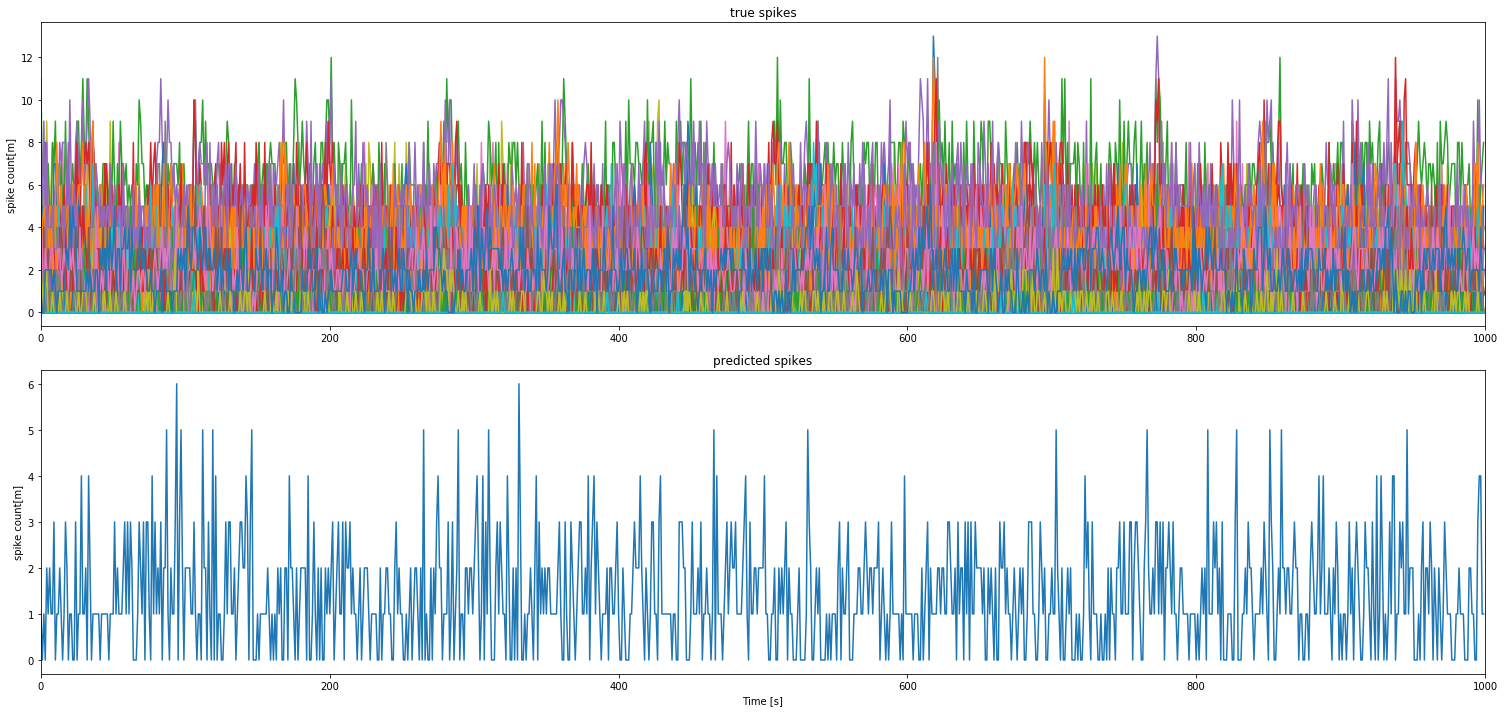

In [21]:
# sample from the inferred distribution 
fig = plt.figure(figsize = (21, 10))
title = 'inferred mean rates'
minmax = (0, 1000)
fig.add_subplot(2,1,1)
plt.plot(X_test[minmax[0]:minmax[1]])
# plt.xlabel('Time [s]')
plt.title('true spikes')
plt.ylabel('spike count[m]')
plt.xlim([minmax[0],minmax[1]])
fig.add_subplot(2,1,2)
plt.plot(samples[minmax[0]:minmax[1]])
plt.xlabel('Time [s]')
plt.title('predicted spikes')
plt.ylabel('spike count[m]')
plt.xlim([minmax[0],minmax[1]])
plt.tight_layout()